In [109]:
import chess.pgn
import pandas as pd
import numpy as np

## Exemple de lecture d'une game

In [110]:
with open("game_data_2013_01.pgn") as pgn_file:
    game = chess.pgn.read_game(pgn_file)

print(game.headers)
print(game.mainline_moves())
print(str(game.mainline_moves()))

Headers(Event='Rated Classical game', Site='https://lichess.org/j1dkb5dw', Date='????.??.??', Round='?', White='BFG9k', Black='mamalak', Result='1-0', UTCDate='2012.12.31', UTCTime='23:01:03', WhiteElo='1639', BlackElo='1403', WhiteRatingDiff='+5', BlackRatingDiff='-8', ECO='C00', Opening='French Defense: Normal Variation', TimeControl='600+8', Termination='Normal')
1. e4 e6 2. d4 b6 3. a3 Bb7 4. Nc3 Nh6 5. Bxh6 gxh6 6. Be2 Qg5 7. Bg4 h5 8. Nf3 Qg6 9. Nh4 Qg5 10. Bxh5 Qxh4 11. Qf3 Kd8 12. Qxf7 Nc6 13. Qe8#
1. e4 e6 2. d4 b6 3. a3 Bb7 4. Nc3 Nh6 5. Bxh6 gxh6 6. Be2 Qg5 7. Bg4 h5 8. Nf3 Qg6 9. Nh4 Qg5 10. Bxh5 Qxh4 11. Qf3 Kd8 12. Qxf7 Nc6 13. Qe8#


## Quelles features des metadatas sont à garder ?

- White
- Black
- Result
- UTCDate
- UTCTime
- WhiteElo
- BlackElo
- Opening
- TimeControl
- Termination

In [111]:
categories = ["White", "Black", "Result", "UTCDate", "UTCTime", "WhiteElo", "BlackElo", "ECO", "Opening", "TimeControl", "Termination"]
int_categories = ["WhiteElo", "BlackElo"]
df = pd.DataFrame(columns=tuple(categories+["Game"]))
games_list = []
NUMB_GAMES = 10000

with open("game_data_2013_01.pgn") as pgn_file:
    n_game=1
    game = chess.pgn.read_game(pgn_file)
    while game and n_game < NUMB_GAMES :
        #moves = str(game.mainline_moves())
        entry = {c:game.headers.get(c,"") for c in categories}
        #entry["Game"] = moves
        games_list.append(entry)
        n_game += 1
        game = chess.pgn.read_game(pgn_file)

df = pd.DataFrame(games_list)
df.dtypes

White          object
Black          object
Result         object
UTCDate        object
UTCTime        object
WhiteElo       object
BlackElo       object
ECO            object
Opening        object
TimeControl    object
Termination    object
dtype: object

In [112]:
### Conversion données

df[["White", "Black", "Result", "ECO",
    "Opening", "TimeControl", "Termination"]] = df[["White", "Black", "Result", "ECO",
                                                    "Opening", "TimeControl", "Termination"]].astype(str)

df.UTCDate = pd.to_datetime(df.UTCDate, format= '%Y.%m.%d')
df.UTCTime = pd.to_datetime(df.UTCTime, format= '%H:%M:%S').dt.time

df = df[(df['WhiteElo'] != '?') & (df['BlackElo'] != '?')]
df.WhiteElo = pd.to_numeric(df.WhiteElo, errors="coerce").astype("Int64")
df.BlackElo = pd.to_numeric(df.BlackElo, errors="coerce").astype("Int64")

MoyenneElo = pd.Series(df.WhiteElo + df.BlackElo) / 2

df.set_index(MoyenneElo, inplace=True)
df = df.sort_index()

df

,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,ECO,Opening,TimeControl,Termination
989.5,kingofchess,nike_the_bullet,0-1,2013-01-03,13:40:39,1011,968,A20,English Opening: King's English Variation,300+15,Normal
1019.5,nike_the_bullet,kingofchess,1-0,2013-01-03,13:40:22,891,1148,B10,Caro-Kann Defense,300+15,Normal
1019.5,kingofchess,nike_the_bullet,0-1,2013-01-03,13:40:07,1148,891,C20,King's Pawn Game,300+15,Normal
1044.5,rohirims,nike_the_bullet,1-0,2013-01-03,12:05:41,1145,944,A00,Barnes Opening: Walkerling,300+15,Normal
1063.5,writinggambler,Viktoriya,1-0,2013-01-01,03:22:48,1102,1025,D00,"Queen's Pawn Game: Levitsky Attack, Welling Va...",1800+30,Normal
...,...,...,...,...,...,...,...,...,...,...,...
2104.0,ostrak11,Ghost_Lombardi,0-1,2013-01-01,17:20:39,2071,2137,E20,Nimzo-Indian Defense,240+0,Time forfeit
2117.0,chert843,jhipolito,1-0,2013-01-02,10:17:54,2180,2054,B12,Caro-Kann Defense: Advance Variation,180+1,Normal
2124.5,ostrak11,Madland91,1-0,2013-01-02,22:51:13,2037,2212,D45,Semi-Slav Defense: Normal Variation,240+0,Normal
2129.0,ObviousEngineUser,Ghost_Lombardi,1-0,2013-01-01,20:53:59,2114,2144,E32,Nimzo-Indian Defense: Classical Variation,180+0,Normal


In [113]:
df.Result.value_counts()
df["Result"][df.Result=="1-0"] = "Victoire des Blancs"
df["Result"][df.Result=="0-1"] = "Victoire des Noirs"
df["Result"][df.Result=="1/2-1/2"] = "Partie nulle"
df

/tmp/ipykernel_7168/3882640662.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["Result"][df.Result=="1-0"] = "Victoire des Blancs"
/tmp/ipykernel_7168/3882640662.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,ECO,Opening,TimeControl,Termination
989.5,kingofchess,nike_the_bullet,Victoire des Noirs,2013-01-03,13:40:39,1011,968,A20,English Opening: King's English Variation,300+15,Normal
1019.5,nike_the_bullet,kingofchess,Victoire des Blancs,2013-01-03,13:40:22,891,1148,B10,Caro-Kann Defense,300+15,Normal
1019.5,kingofchess,nike_the_bullet,Victoire des Noirs,2013-01-03,13:40:07,1148,891,C20,King's Pawn Game,300+15,Normal
1044.5,rohirims,nike_the_bullet,Victoire des Blancs,2013-01-03,12:05:41,1145,944,A00,Barnes Opening: Walkerling,300+15,Normal
1063.5,writinggambler,Viktoriya,Victoire des Blancs,2013-01-01,03:22:48,1102,1025,D00,"Queen's Pawn Game: Levitsky Attack, Welling Va...",1800+30,Normal
...,...,...,...,...,...,...,...,...,...,...,...
2104.0,ostrak11,Ghost_Lombardi,Victoire des Noirs,2013-01-01,17:20:39,2071,2137,E20,Nimzo-Indian Defense,240+0,Time forfeit
2117.0,chert843,jhipolito,Victoire des Blancs,2013-01-02,10:17:54,2180,2054,B12,Caro-Kann Defense: Advance Variation,180+1,Normal
2124.5,ostrak11,Madland91,Victoire des Blancs,2013-01-02,22:51:13,2037,2212,D45,Semi-Slav Defense: Normal Variation,240+0,Normal
2129.0,ObviousEngineUser,Ghost_Lombardi,Victoire des Blancs,2013-01-01,20:53:59,2114,2144,E32,Nimzo-Indian Defense: Classical Variation,180+0,Normal


<Axes: title={'center': 'Résultats des parties'}, ylabel='count'>

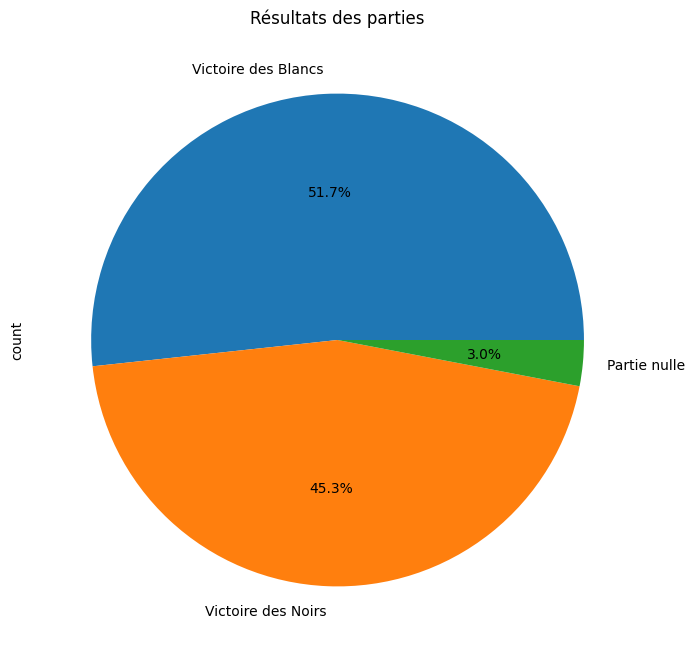

In [114]:
df.Result.value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8), title="Résultats des parties")

In [115]:
joueurs = pd.Series(pd.concat([df.White, df.Black]))
joueurs.value_counts()[:10]

ChikiPuki            318
t4nk                 258
WormHole             195
F1_ALONSO_FERRARI    176
cheesedout           168
nichiren1967         162
jhipolito            141
Atomicangel          137
kent777              134
oilmanesh            114
Name: count, dtype: int64

In [116]:
base_time = pd.to_numeric(df["TimeControl"].apply(lambda x: x.split("+")[0]), errors="coerce").astype("Int64")
mask_classical = base_time >= 1800
df.loc[mask_classical, "TimeControl"] = "Classical"
mask_rapid = (base_time >= 600) & (base_time < 1800)
df.loc[mask_rapid, "TimeControl"] = "Rapid"
mask_blitz = base_time < 600
df.loc[mask_blitz, "TimeControl"] = "Blitz"
df

,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,ECO,Opening,TimeControl,Termination
989.5,kingofchess,nike_the_bullet,Victoire des Noirs,2013-01-03,13:40:39,1011,968,A20,English Opening: King's English Variation,Blitz,Normal
1019.5,nike_the_bullet,kingofchess,Victoire des Blancs,2013-01-03,13:40:22,891,1148,B10,Caro-Kann Defense,Blitz,Normal
1019.5,kingofchess,nike_the_bullet,Victoire des Noirs,2013-01-03,13:40:07,1148,891,C20,King's Pawn Game,Blitz,Normal
1044.5,rohirims,nike_the_bullet,Victoire des Blancs,2013-01-03,12:05:41,1145,944,A00,Barnes Opening: Walkerling,Blitz,Normal
1063.5,writinggambler,Viktoriya,Victoire des Blancs,2013-01-01,03:22:48,1102,1025,D00,"Queen's Pawn Game: Levitsky Attack, Welling Va...",Classical,Normal
...,...,...,...,...,...,...,...,...,...,...,...
2104.0,ostrak11,Ghost_Lombardi,Victoire des Noirs,2013-01-01,17:20:39,2071,2137,E20,Nimzo-Indian Defense,Blitz,Time forfeit
2117.0,chert843,jhipolito,Victoire des Blancs,2013-01-02,10:17:54,2180,2054,B12,Caro-Kann Defense: Advance Variation,Blitz,Normal
2124.5,ostrak11,Madland91,Victoire des Blancs,2013-01-02,22:51:13,2037,2212,D45,Semi-Slav Defense: Normal Variation,Blitz,Normal
2129.0,ObviousEngineUser,Ghost_Lombardi,Victoire des Blancs,2013-01-01,20:53:59,2114,2144,E32,Nimzo-Indian Defense: Classical Variation,Blitz,Normal


TimeControl
Blitz        8489
Rapid        1391
Classical      73
Name: count, dtype: int64

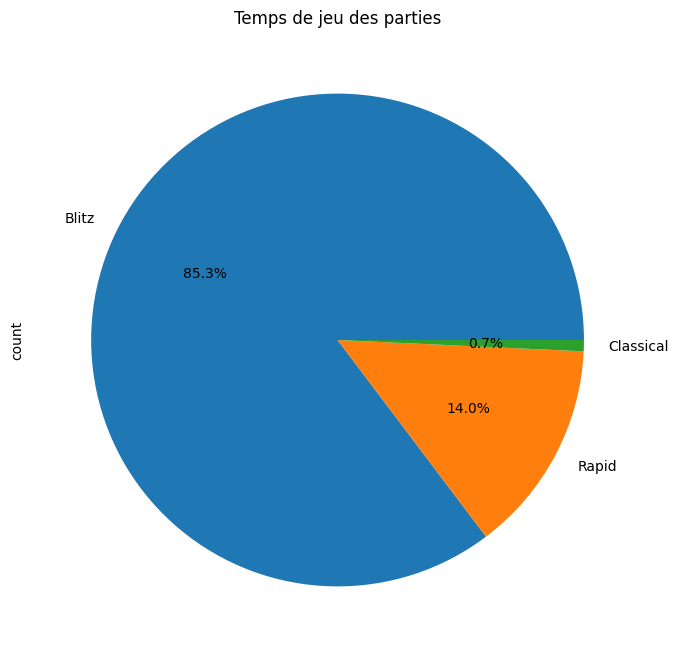

In [117]:
df = df[df["TimeControl"] != "-"]
df.TimeControl.value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8), title="Temps de jeu des parties")
df.TimeControl.value_counts()

## Visualisation des données

In [118]:
import matplotlib.pyplot as plt

### ELO équilibrés ?

<Axes: ylabel='Frequency'>

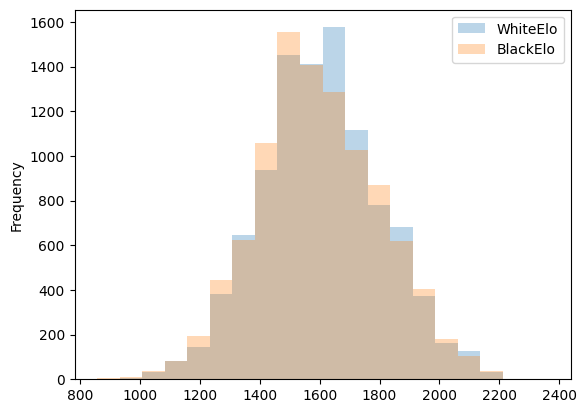

In [119]:
df[["WhiteElo","BlackElo"]].plot.hist(bins=20, alpha=0.3)

/tmp/ipykernel_7168/859328898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["niveau_des_blancs"] = df.WhiteElo.apply(lambda x: "éclaté" if x < 1400 else "moyen" if x < 1800 else "fort")


<Axes: title={'center': 'Niveau des blancs'}, ylabel='count'>

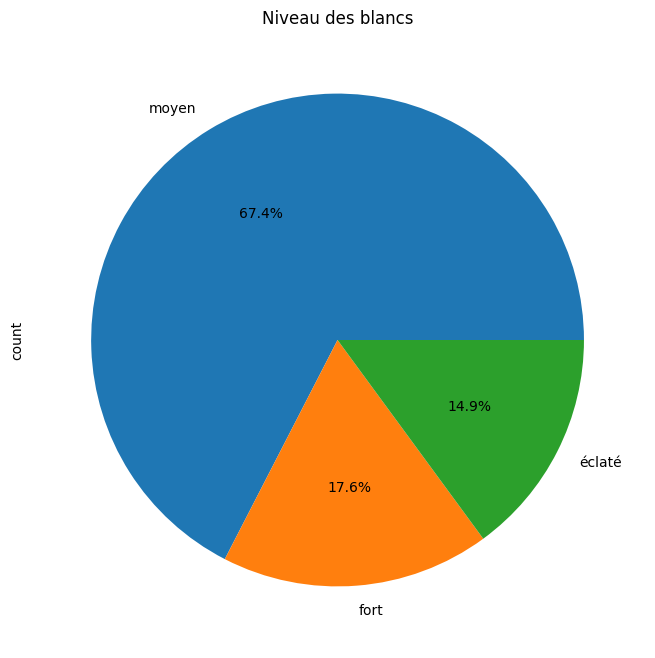

In [120]:
df["niveau_des_blancs"] = df.WhiteElo.apply(lambda x: "éclaté" if x < 1400 else "moyen" if x < 1800 else "fort")
df.niveau_des_blancs.value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8), title="Niveau des blancs")

On choisit de prendre 3 plages élo : une de moins de 1400, une de 1400 à 1800 et une de plus de 1800

### Pourcentage d'ouvertures agressives

In [121]:
aggressive_openings = ["gambit", "attack","albin", "englund", "scotch"]
df.Opening.str.lower().str.contains('|'.join(aggressive_openings)).sum()/ len(df)

0.24766402089822165

<Axes: xlabel='Opening'>

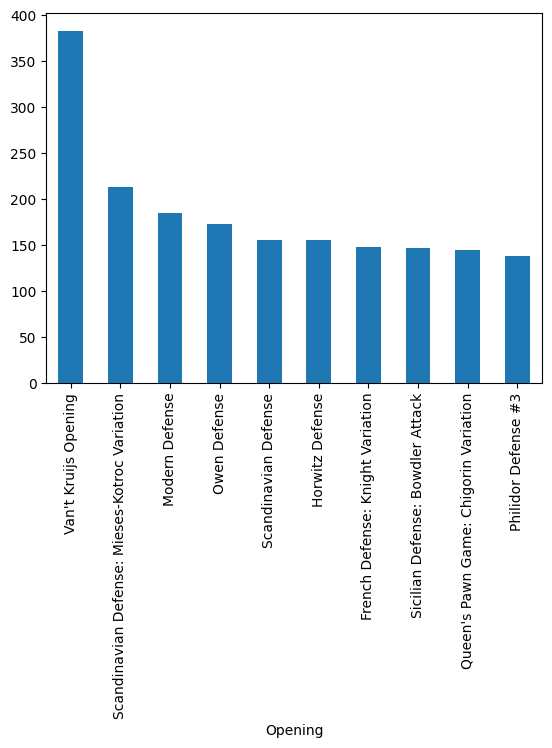

In [122]:
df.Opening.value_counts()[:10].plot.bar()

Différentes varaiantes de la même ouverture sont comptées plusieurs fois.

/tmp/ipykernel_7168/618275606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Opening_simplified"] = df.Opening.copy()
/tmp/ipykernel_7168/618275606.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignmen

<Axes: xlabel='Opening_simplified'>

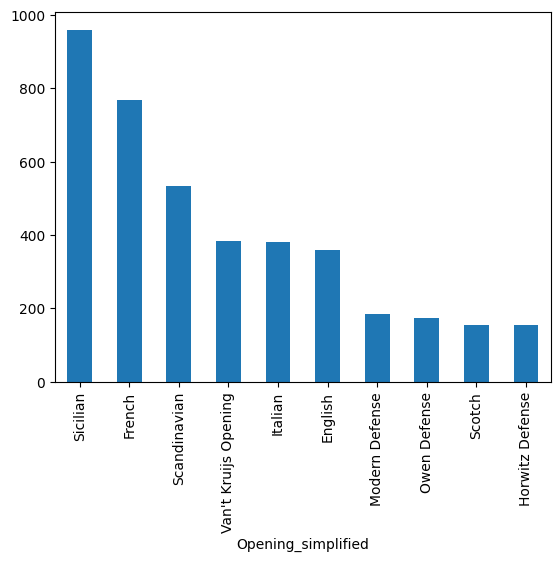

In [123]:
df["Opening_simplified"] = df.Opening.copy()
df["Opening_simplified"][df.Opening.str.contains("French", case=False)] = "French"
df["Opening_simplified"][df.Opening.str.contains("Sicilian", case=False)] = "Sicilian"
df["Opening_simplified"][df.Opening.str.contains("Queens Gambit", case=False)] = "Queens Gambit"
df["Opening_simplified"][df.Opening.str.contains("Spanish", case=False)] = "Spanish"
df["Opening_simplified"][df.Opening.str.contains("Italian", case=False)] = "Italian"
df["Opening_simplified"][df.Opening.str.contains("English", case=False)] = "English"
df["Opening_simplified"][df.Opening.str.contains("Scotch", case=False)] = "Scotch"
df["Opening_simplified"][df.Opening.str.contains("Kings Indian", case=False)] = "Kings Indian"
df["Opening_simplified"][df.Opening.str.contains("Queens Indian", case=False)] = "Queens Indian"
df["Opening_simplified"][df.Opening.str.contains("Nimzo Indian", case=False)] = "Nimzo Indian"
df["Opening_simplified"][df.Opening.str.contains("Grunfeld", case=False)] = "Grunfeld"
df["Opening_simplified"][df.Opening.str.contains("Dutch", case=False)] = "Dutch"
df["Opening_simplified"][df.Opening.str.contains("Benoni", case=False)] = "Benoni"
df["Opening_simplified"][df.Opening.str.contains("Scandinavian", case=False)] = "Scandinavian"

df.Opening_simplified.value_counts()[:10].plot.bar()